## Importing DataSet & Packages

In [83]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv('dirty_df')
sns.set_palette('mako')

#### About Dataset

## Features:

1-Age | Objective Feature | age | int (days)<br>
2-Height | Objective Feature | height | int (cm) |<br>
3-Weight | Objective Feature | weight | float (kg) |<br>
4-Gender | Objective Feature | gender | categorical code |(1 for female, 2 for male)  <br>
5-Systolic blood pressure | Examination Feature | ap_hi | int |<br>
6-Diastolic blood pressure | Examination Feature | ap_lo | int |<br>
7-Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |<br>
8-Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |<br>
9-Smoking | Subjective Feature | smoke | binary |<br>
10-Alcohol intake | Subjective Feature | alco | binary |<br>
11-Physical activity | Subjective Feature | active | binary |<br>
12=Presence or absence of cardiovascular disease | Target Variable | cardio | binary |<br>

## Data Exploration

In [84]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469.0,female,155,69.0,130,80,above normal,above normal,non smoker,no,active,-ve
1,989,14648.0,female,163,71.0,110,70,normal,normal,non smoker,no,active,+ve
2,990,NaN,NaN,165,70.0,120,80,normal,normal,NaN,no,active,-ve
3,991,14549.0,male,165,85.0,120,80,normal,normal,smoker,yes,active,-ve
4,992,23393.0,female,155,62.0,120,80,normal,normal,non smoker,no,active,-ve


In [85]:
df.shape

(69301, 13)

In [86]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [87]:
df.describe()

,id,age,height,weight,ap_hi,ap_lo
count,69301.000000,69001.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.954001,164.362217,74.203027,128.829584,96.650092
std,28563.100347,2467.410502,8.205337,14.383469,154.775805,189.096240
min,988.000000,10798.000000,55.000000,10.000000,-150.000000,-70.000000
25%,25745.000000,17665.000000,159.000000,65.000000,120.000000,80.000000
50%,50494.000000,19704.000000,165.000000,72.000000,120.000000,80.000000
75%,75150.000000,21327.000000,170.000000,82.000000,140.000000,90.000000
max,99999.000000,23713.000000,250.000000,200.000000,16020.000000,11000.000000


In [88]:
df['ap_lo'].loc[df['ap_lo']<=0]

1315      0
12790     0
15760     0
16682     0
22224     0
23168     0
24755     0
26987     0
31084     0
37671     0
39631     0
40806     0
41698     0
43223     0
45136     0
47350     0
51881     0
56251     0
59407   -70
63088     0
64604     0
67964     0
Name: ap_lo, dtype: int64

In [89]:
df.iloc[1315]

id                   2845
age               22712.0
gender               male
height                167
weight               59.0
ap_hi                 906
ap_lo                   0
cholesterol        normal
gluc               normal
smoke          non smoker
alco                   no
active             active
cardio                -ve
Name: 1315, dtype: object

In [90]:
len(df['ap_lo'].loc[df['ap_lo']<=0])/len(df)*100

0.03174557365694579

In [91]:
len(df['ap_hi'].loc[df['ap_hi']<=0])/len(df)*100

0.010100864345391841

In [92]:
df = df[(df['ap_hi'] >= 0) & (df['ap_lo'] >= 0)]

In [93]:
df.describe()

,id,age,height,weight,ap_hi,ap_lo
count,69293.000000,68993.000000,69293.000000,69293.000000,69293.000000,69293.000000
mean,50472.523660,19468.957300,164.362374,74.203830,128.856436,96.654323
std,28563.455928,2467.243498,8.205636,14.383436,154.763711,189.105998
min,988.000000,10798.000000,55.000000,10.000000,1.000000,0.000000
25%,25745.000000,17665.000000,159.000000,65.000000,120.000000,80.000000
50%,50498.000000,19704.000000,165.000000,72.000000,120.000000,80.000000
75%,75152.000000,21326.000000,170.000000,82.000000,140.000000,90.000000
max,99999.000000,23713.000000,250.000000,200.000000,16020.000000,11000.000000


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69293 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69293 non-null  int64  
 1   age          68993 non-null  float64
 2   gender       68893 non-null  object 
 3   height       69293 non-null  int64  
 4   weight       69293 non-null  float64
 5   ap_hi        69293 non-null  int64  
 6   ap_lo        69293 non-null  int64  
 7   cholesterol  69223 non-null  object 
 8   gluc         69293 non-null  object 
 9   smoke        68693 non-null  object 
 10  alco         69293 non-null  object 
 11  active       69293 non-null  object 
 12  cardio       69293 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 7.4+ MB


In [95]:
df.duplicated().sum()

0

In [96]:
df.isna().sum()

id               0
age            300
gender         400
height           0
weight           0
ap_hi            0
ap_lo            0
cholesterol     70
gluc             0
smoke          600
alco             0
active           0
cardio           0
dtype: int64

In [97]:
#drop unnecessary columns
df.drop(columns='id',inplace=True)

In [98]:
val_to_replace={'-ve': 0,'+ve':1}
df['cardio']=df['cardio'].replace(val_to_replace)

In [99]:
df['cardio']

0        0
1        1
2        0
3        0
4        0
        ..
69296    0
69297    1
69298    1
69299    1
69300    0
Name: cardio, Length: 69293, dtype: int64

## Feature Engineering

#### Feature Transformation

In [100]:
#Age Column transform from days to years 
df['age']//365

0        61.0
1        40.0
2         NaN
3        39.0
4        64.0
         ... 
69296    52.0
69297    61.0
69298    52.0
69299    61.0
69300    56.0
Name: age, Length: 69293, dtype: float64

In [101]:
df['age']=df['age']//365

#### Feature Extraction

Create a new feature bmi(body mass index)

In [102]:
#bmi=weight in kg/(height in m )**2
df['weight']/(df['height']/100)**2

0        28.720083
1        26.722873
2        25.711662
3        31.221304
4        25.806452
           ...    
69296    26.927438
69297    50.472681
69298    31.353579
69299    27.099251
69300    24.913495
Length: 69293, dtype: float64

In [103]:
df['bmi']=df['weight']/(df['height']/100)**2

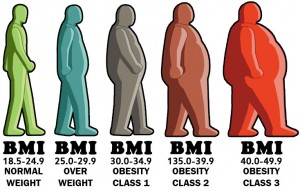

create body mass index categories 

In [104]:
#Deature Transformation
df['bmi'].loc[df['bmi']<18.5]

340      17.908855
368      18.359375
418      17.345169
591      17.846520
593      17.211087
           ...    
69035    17.669297
69098    16.731112
69165    16.979592
69209    18.178670
69220    17.799929
Name: bmi, Length: 641, dtype: float64

In [105]:
def bmi_cat(df):
    df['bmi_cat'] = 'Obesity Class III'
    df.loc[df['bmi'] < 39.9, 'bmi_cat'] = 'Obesity Class II'
    df.loc[df['bmi'] < 34.9, 'bmi_cat'] = 'Obesity Class I'
    df.loc[df['bmi'] < 29.9, 'bmi_cat'] = 'Overweight'
    df.loc[df['bmi'] < 24.9, 'bmi_cat'] = 'Normal weight'
    df.loc[df['bmi'] < 18.5, 'bmi_cat'] = 'Underweight'
    return df['bmi_cat']
bmi_cat(df)

0               Overweight
1               Overweight
2               Overweight
3          Obesity Class I
4               Overweight
               ...        
69296           Overweight
69297    Obesity Class III
69298      Obesity Class I
69299           Overweight
69300           Overweight
Name: bmi_cat, Length: 69293, dtype: object

In [106]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi', 'bmi_cat'],
      dtype='object')

Create MAP (Mean Arterial Pressure ) 

In [107]:
#MAP=(2*ap_hi+ap_low)/3
df['map']=(2*df['ap_hi']+df['ap_lo'])/3

In [108]:
df['map'].head()

0    113.333333
1     96.666667
2    106.666667
3    106.666667
4    106.666667
Name: map, dtype: float64

In [109]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi', 'bmi_cat', 'map'],
      dtype='object')

### Seprating Numerical and Categorical Columns  

In [110]:
#for ease of Exploration and Visualization
categorical_cols=['gender','cholesterol','gluc','smoke','alco','active','bmi_cat']
numerical_cols=['age','height','weight','ap_hi','ap_lo','bmi','map']
#Target= Cardio Column

#### Split the data into train and test datasets

In [111]:
#could do it manually or using sci-kit learn
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.3,random_state=42)

In [112]:
print(df_train.shape)
print(df_test.shape)

(48505, 15)
(20788, 15)


## EDA

### Plotting numerical columns

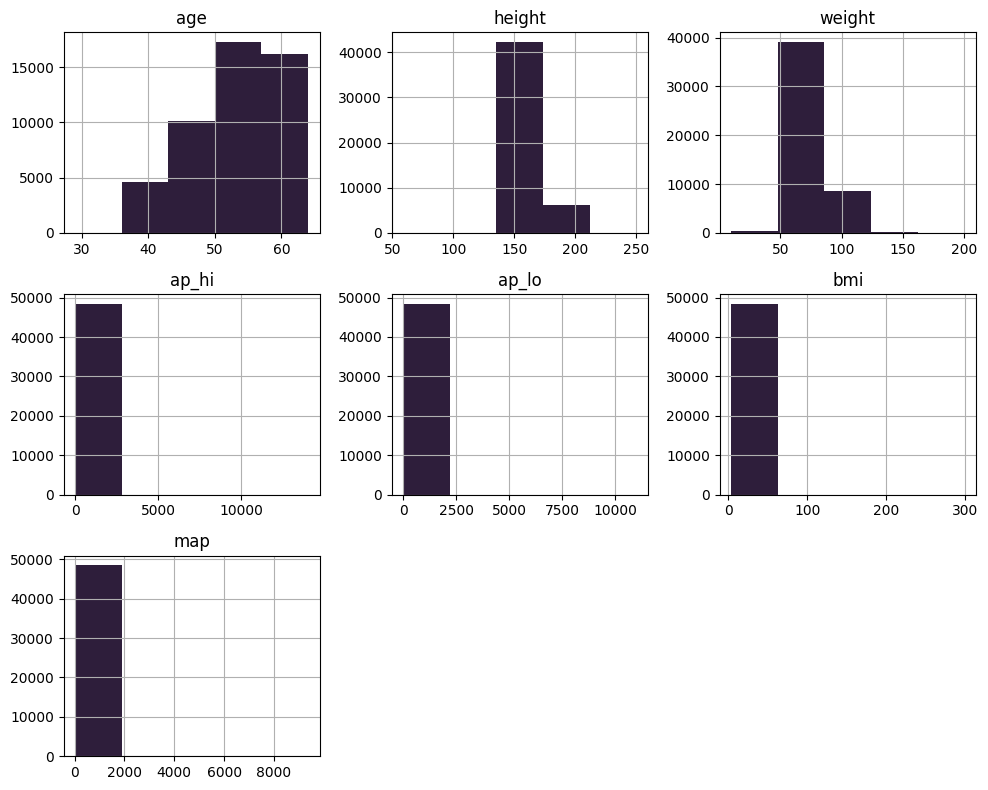

In [113]:
df_train[numerical_cols].hist(bins=5,figsize=(10,8))
plt.tight_layout()
plt.show()

## Univariate Analysis

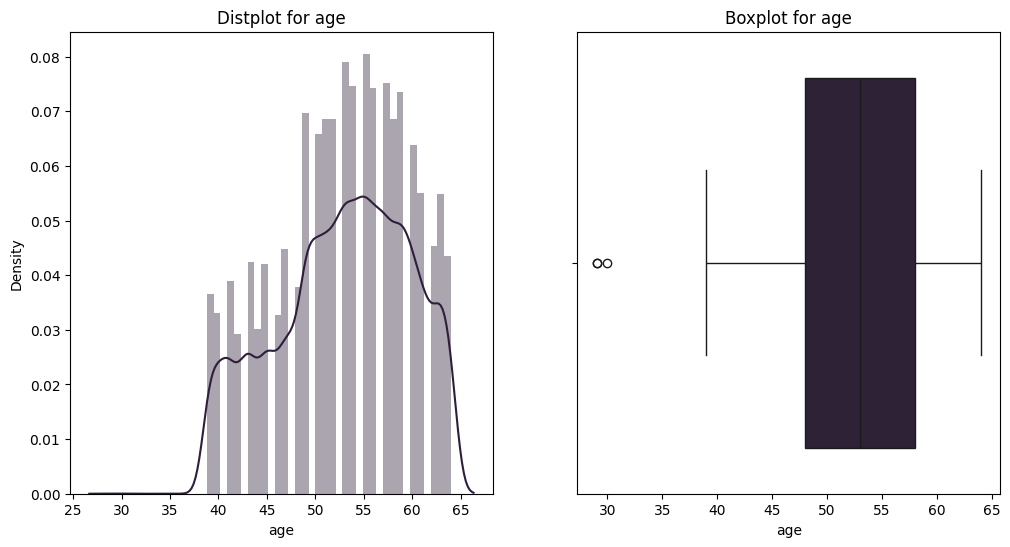

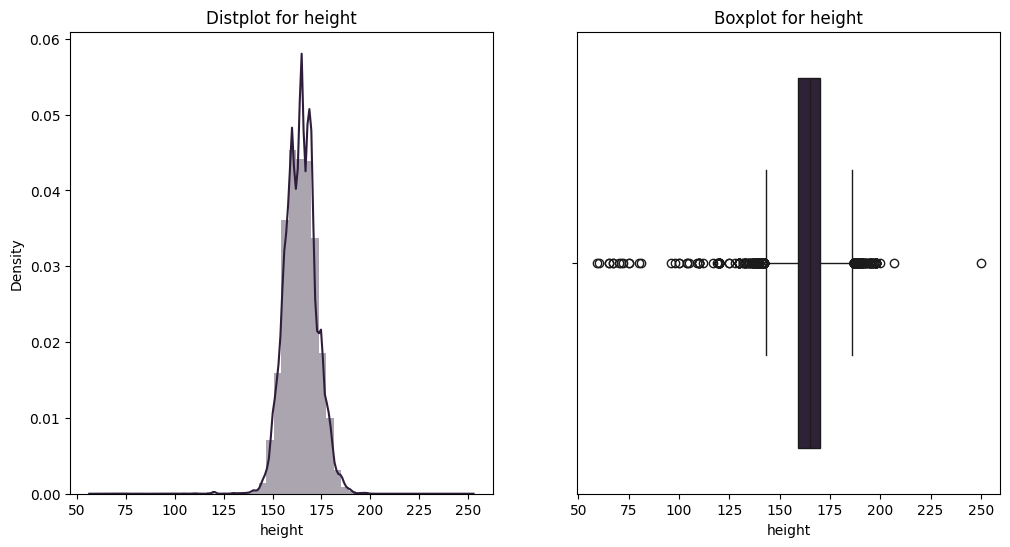

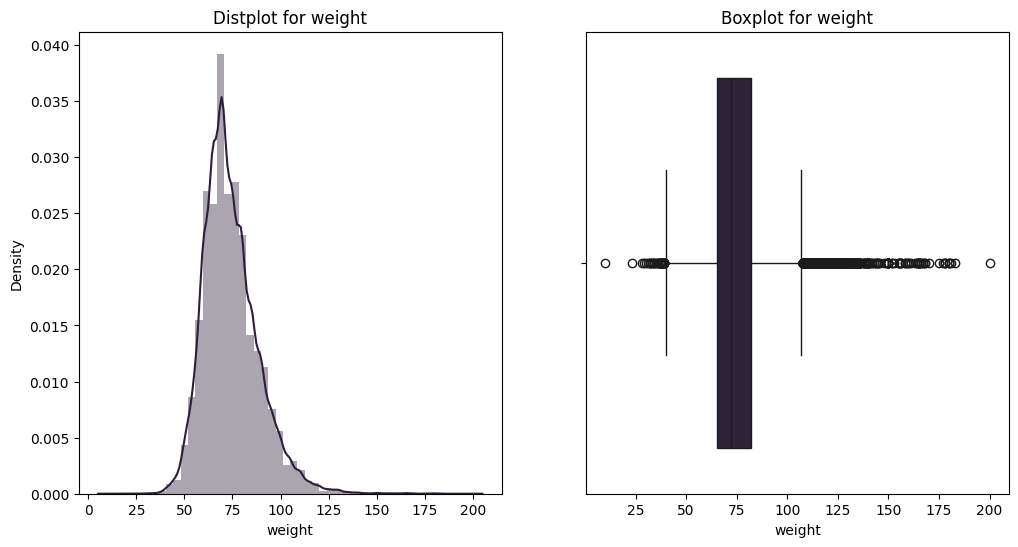

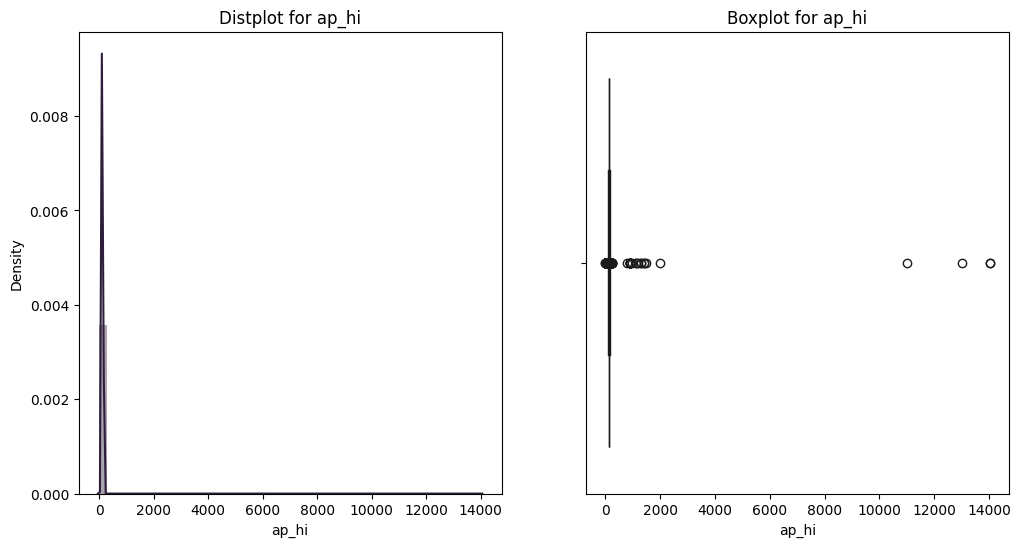

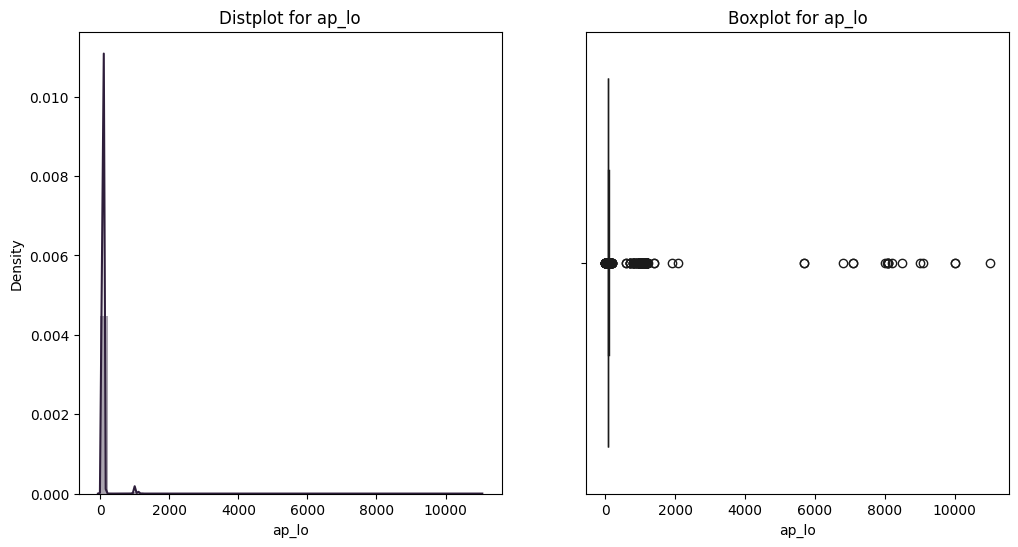

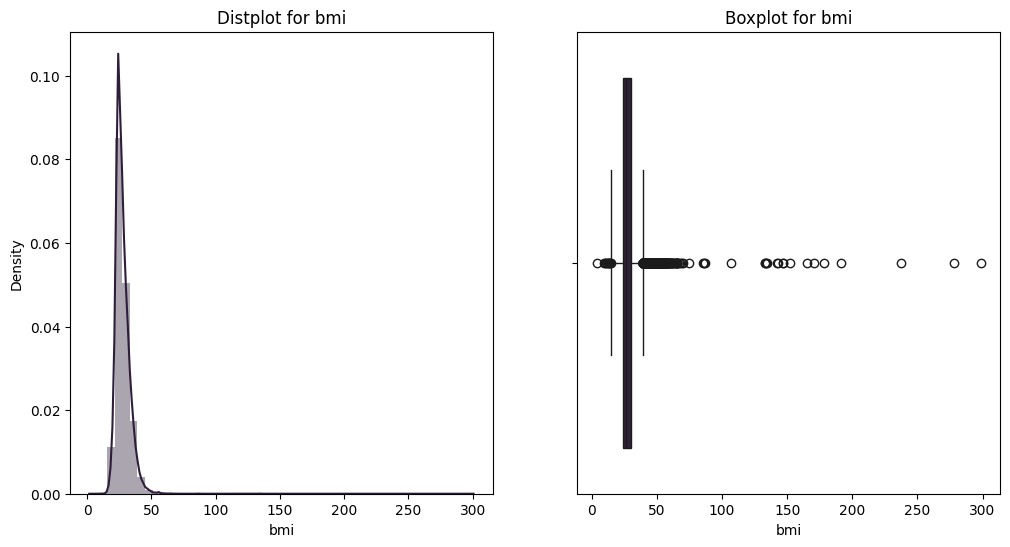

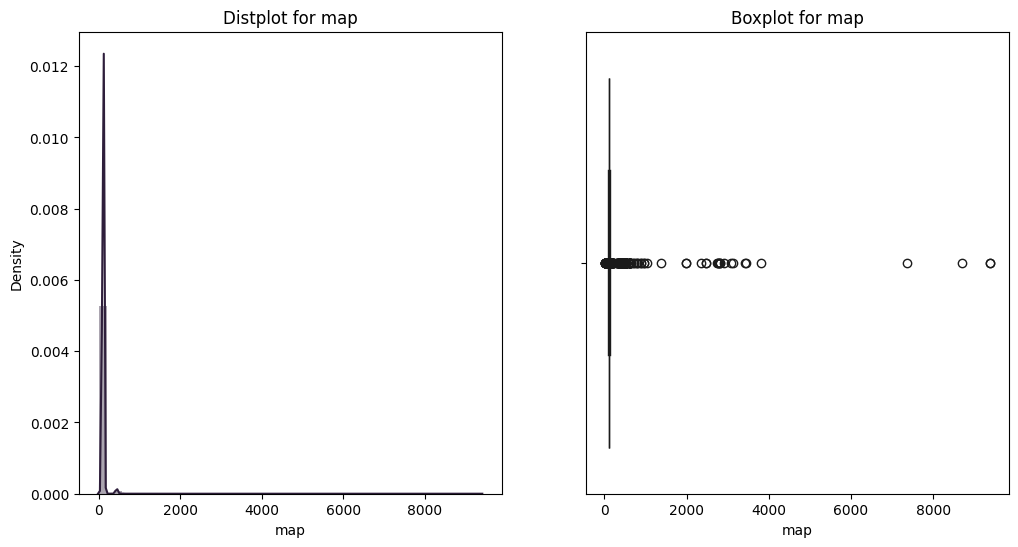

In [114]:
for col in numerical_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    sns.distplot(df_train[col], ax=ax[0] )  
    sns.boxplot(x=df_train[col], ax=ax[1])
    ax[0].set_title('Distplot for ' + col)
    ax[1].set_title('Boxplot for ' + col)
    plt.show()

### Plotting Colinearity

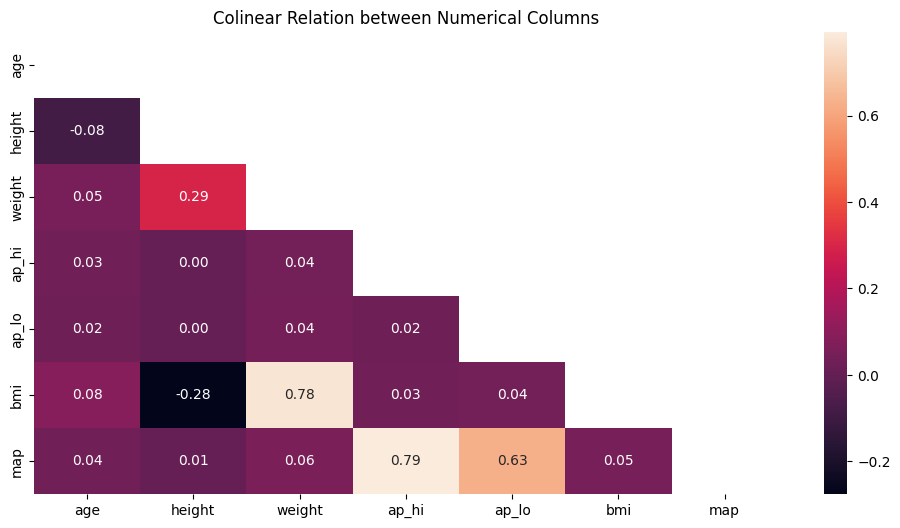

In [115]:
corr = df_train[numerical_cols].corr(numeric_only=True)
mask = np.triu(corr)
mask=mask
plt.figure(figsize=(12, 6))
plt.title('Colinear Relation between Numerical Columns')
sns.heatmap(corr, annot=True,mask=mask, fmt='.2f')
sns.color_palette("mako", as_cmap=True)
plt.show()

### Plotting Target Column

Text(0.5, 1.0, 'Target Percentage')

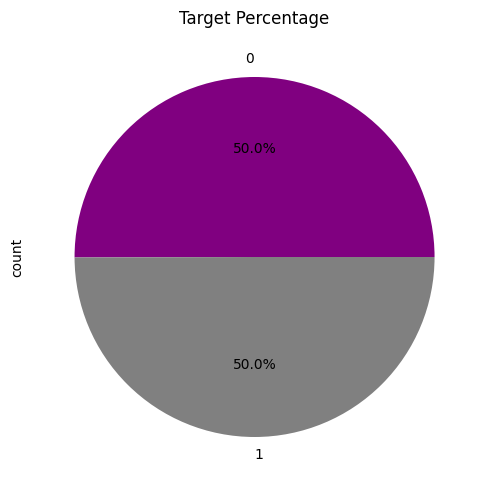

In [116]:
df['cardio'].value_counts().plot.pie(autopct='%1.1f%%',textprops={'fontsize': 10},colors=['purple','grey'])
plt.tight_layout()
plt.title('Target Percentage')

### Plotting Categorical Columns

In [117]:
categorical_cols

['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi_cat']

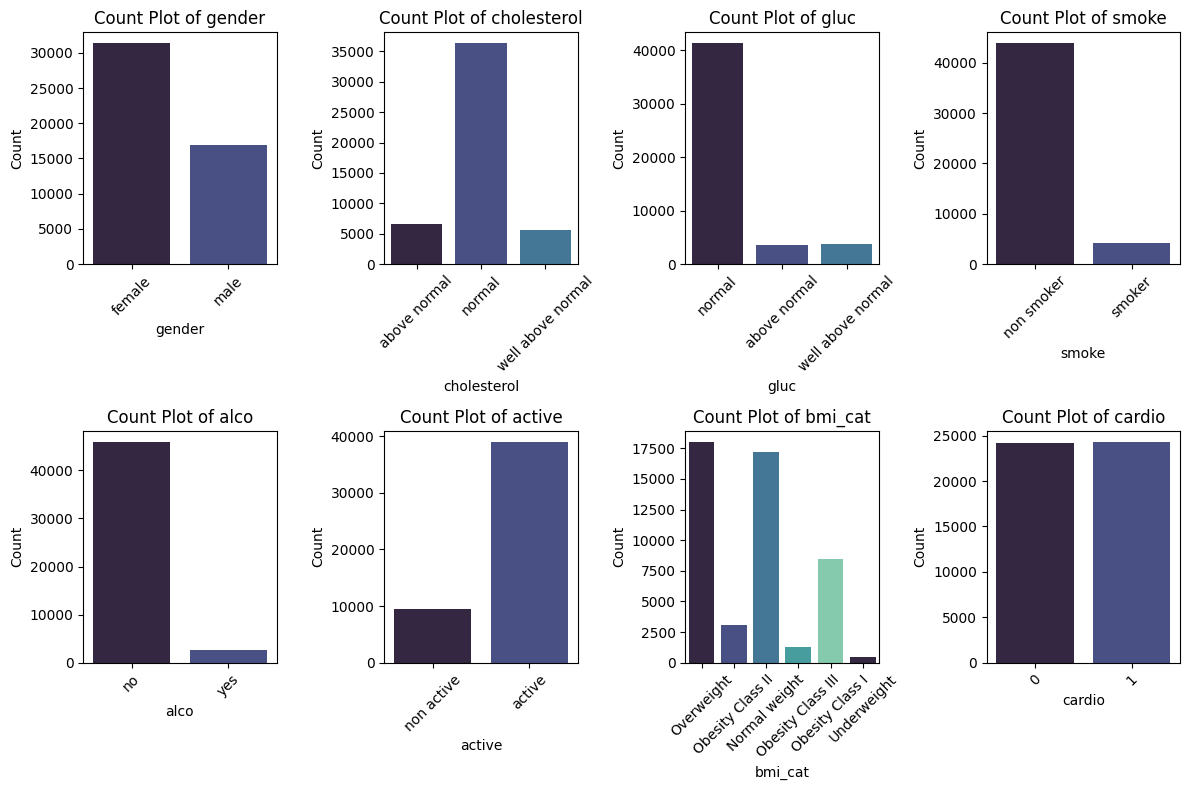

In [118]:
cat_plot=categorical_cols+['cardio']
palette=sns.color_palette('mako',5)
num_plots = len(cat_plot)
num_cols = 4  # Number of columns in the plot grid
num_rows = -(-num_plots // num_cols)  # Ceiling division to calculate number of rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))
axes = axes.flatten()  # Flatten the axes array if it's multidimensional
for i, column in enumerate(cat_plot):
    ax = axes[i]
    sns.countplot(x=column, data=df_train, ax=ax,palette=palette)
    ax.set_title(f'Count Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

## Preprocessing

In [119]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.ensemble import RandomForestRegressor

In [120]:
df_train.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi', 'bmi_cat', 'map'],
      dtype='object')

#### Imputation

In [121]:
#take a copy of the train and test data
df_train_cp=df_train.copy()
df_test_cp=df_test.copy()

In [122]:
#Use simple imputer to fill the null values 
imputer=SimpleImputer(strategy='median')
#Fit the Imputer means computing the median for every column
imputer.fit(df_train_cp[numerical_cols])
#Transform the columns means imputing the missing data
imputer.transform(df_train_cp[numerical_cols])
#Or use the combined function fut_transform to do both one after the other 
df_train_cp[numerical_cols]=imputer.fit_transform(df_train_cp[numerical_cols])
#Dont use fit_transform on the test data only use transfrom
df_test_cp[numerical_cols]=imputer.transform(df_test_cp[numerical_cols])

In [123]:
#Same for Categorical Columns 
cat_imputer=SimpleImputer(strategy='most_frequent')
df_train_cp[categorical_cols]=cat_imputer.fit_transform(df_train_cp[categorical_cols])
df_test_cp[categorical_cols]=cat_imputer.transform(df_test_cp[categorical_cols])

In [124]:
df_train_cp.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
bmi            0
bmi_cat        0
map            0
dtype: int64

In [125]:
# Missing values can also be replaced with the mean value
# (strategy="mean"), or with the most frequent value
# (strategy="most_frequent"), or with a constant value
# (strategy="constant", fill_value=…). The last two strategies
# support non-numerical data.

There are also more powerful imputers available in the sklearn.impute package<br>
(both for numerical features only):<br>
<br>
KNNImputer replaces each missing value with the mean of the k-nearest<br>
neighbors’ values for that feature. The distance is based on all the available
features.<br>
<br>
IterativeImputer trains a regression model per feature to predict the<br>
missing values based on all the other available features. It then trains the model<br>
again on the updated data, and repeats the process several times, improving the<br>
models and the replacement values at each iteration.<br>

In [126]:
#SCIKIT-LEARN DESIGN
#Estimators
#Transformers
#Predictors

#### Handling Text and Categorical Attributes


In [127]:
#Types of Encoders LabelEncoder,OrdinalEncoder,OneHotEncoder
categorical_cols

['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi_cat']

In [128]:
for col in categorical_cols:
    print(df_train_cp[col].value_counts())
    print('----------------')

gender
female    31640
male      16865
Name: count, dtype: int64
----------------
cholesterol
normal               36362
above normal          6598
well above normal     5545
Name: count, dtype: int64
----------------
gluc
normal               41277
well above normal     3663
above normal          3565
Name: count, dtype: int64
----------------
smoke
non smoker    44289
smoker         4216
Name: count, dtype: int64
----------------
alco
no     45883
yes     2622
Name: count, dtype: int64
----------------
active
active        38963
non active     9542
Name: count, dtype: int64
----------------
bmi_cat
Overweight           18015
Normal weight        17189
Obesity Class I       8477
Obesity Class II      3091
Obesity Class III     1278
Underweight            455
Name: count, dtype: int64
----------------


In [129]:
#If the Column contains only 2 unique values ,use a label encoder
#If the column has a certain order like (low,medium,high) and has a similar distribution,use an ordinal encoder
#If there is too many unique values in the column ,we could use a onehote ncoder or an ordinal encoder

In [130]:
#Create a list of columns  for each encoder 
lab=['gender','smoke','alco','active','cardio']
ord=['cholesterol','gluc']
one=['bmi_cat']

In [131]:
lab_encoder=LabelEncoder()
ord_encoder=OrdinalEncoder()
one_encoder=OneHotEncoder(sparse_output=False) 


label_encoder

In [132]:
#have to make a function or a for loop to run label encoder for mulyipule columns 
#df_train_cp[lab]=lab_encoder.fit_transform(df_train_cp[lab])

In [133]:
for col in lab:
    df_train_cp[col]=lab_encoder.fit_transform(df_train_cp[col])
    df_test_cp[col]=lab_encoder.transform(df_test_cp[col])

In [134]:
df_train_cp[lab]

,gender,smoke,alco,active,cardio
67685,0,0,0,1,0
23724,0,0,0,0,1
46127,1,0,0,1,0
68034,1,0,0,0,0
24456,1,0,0,0,0
...,...,...,...,...,...
37200,0,0,0,1,1
6266,0,0,0,0,1
54893,1,1,0,0,1
860,1,0,0,0,1


ordinal_encoder

In [135]:
#Ordinal encoder outputs a ndarray conataining the encodeed values 
encoded_arr=ord_encoder.fit_transform(df_train_cp[ord])
#Create a dataframe for the encoded_array with the train data index
df_encoded=pd.DataFrame(encoded_arr,columns=ord,index=df_train_cp.index)
#Combine the original data with the encoded columns and dropping the original
df_train_cp = pd.concat([df_train_cp.drop(ord, axis=1), df_encoded], axis=1)

In [136]:
#same for the test data but use transform

encoded_arr_test=ord_encoder.fit_transform(df_test_cp[ord])

df_encoded_test=pd.DataFrame(encoded_arr_test,columns=ord,index=df_test_cp.index)

df_test_cp = pd.concat([df_test_cp.drop(ord, axis=1), df_encoded_test], axis=1)


In [137]:
df_train_cp['cholesterol'].value_counts()

cholesterol
1.0    36362
0.0     6598
2.0     5545
Name: count, dtype: int64

one_hot_encoder

In [138]:
#Fit_transform the train data 
encoded_col=one_encoder.fit_transform(df_train_cp[one])
# Create a DataFrame with the encoded data
df_encoded = pd.DataFrame(encoded_col, columns=one_encoder.get_feature_names_out(['bmi_cat']),index=df_train_cp.index)
# Concatenate the encoded columns with the original DataFrame (excluding the original 'Brand' column)
df_train_cp = pd.concat([df_train_cp.drop('bmi_cat', axis=1), df_encoded], axis=1)


In [139]:
#Fit_transform the train data 
encoded_col_test=one_encoder.transform(df_test_cp[one])
# Create a DataFrame with the encoded data
df_encoded_test = pd.DataFrame(encoded_col_test, columns=one_encoder.get_feature_names_out(['bmi_cat']),index=df_test_cp.index)
# Concatenate the encoded columns with the original DataFrame (excluding the original 'Brand' column)
df_test_cp = pd.concat([df_test_cp.drop('bmi_cat', axis=1), df_encoded_test], axis=1)

Now we are ready with our encoded columns 2 steps left 

### Outliers detection and transformation

In [140]:
#Outlier Equation
def outlier_threshhold(dataframe,column,q1=0.25,q3=0.75):
    Q1=dataframe[column].quantile(q1)
    Q3=dataframe[column].quantile(q3)
    iqr=Q3-Q1
    up_limit=Q3+1.5*iqr
    low_limit=Q1-1.5*iqr
    return low_limit,up_limit

#Outlier Count    
def outlier_percentage(dataframe, column):
    low_limit, up_limit = outlier_threshhold(dataframe, column)
    outliers = [x for x in dataframe[column] if (x > up_limit) or (x < low_limit)]  # Changed | to or
    print(column)  # Changed col to column
    print("Outliers percentage:", len(outliers) / dataframe[column].shape[0] * 100, "%")
    # print("Outliers Count :", len(outliers))
    print("-------------------------")

#Checking Outliers 
def check_outliers(dataframe,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    outliers=(dataframe[column]>up_limit) | (dataframe[column]<low_limit)
    if outliers.any():
        return True
    else:
        return False
#Replace with IQR     
def replace_with_threshholds(dataframe,dataframe2,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    dataframe.loc[(dataframe[column]<low_limit),column]=low_limit
    dataframe.loc[(dataframe[column]>up_limit),column]=up_limit
    dataframe2.loc[(dataframe2[column]<low_limit),column]=low_limit
    dataframe2.loc[(dataframe2[column]>up_limit),column]=up_limit  


for col in (numerical_cols):
    outlier_percentage(df_train_cp,col)

age
Outliers percentage: 0.006184929388722812 %
-------------------------
height
Outliers percentage: 0.7628079579424801 %
-------------------------
weight
Outliers percentage: 2.5337594062467788 %
-------------------------
ap_hi
Outliers percentage: 2.034841768889805 %
-------------------------
ap_lo
Outliers percentage: 6.646737449747449 %
-------------------------
bmi
Outliers percentage: 2.8945469539222763 %
-------------------------
map
Outliers percentage: 6.842593547057005 %
-------------------------


In [141]:
for column in numerical_cols:
    replace_with_threshholds(df_train_cp,df_test_cp,column)
    print(column,check_outliers(df_train_cp,column))

age False
height False
weight False
ap_hi False
ap_lo False
bmi False
map False


### Skewness

In [142]:
def detect_skewness(dataframe, threshold=0.5):

    skewed_columns = []
    
    for column in dataframe.columns:
        skewness = dataframe[column].skew()
        if abs(skewness) > threshold:
            skewed_columns.append((column, skewness))
    
    return skewed_columns
skewed_cols = detect_skewness(df_train_cp[numerical_cols])
print("Skewed columns:", skewed_cols)

Skewed columns: [('weight', 0.5095778060737691), ('ap_hi', 0.5981166167652533), ('bmi', 0.6892782756851622)]


In [143]:
# def log_transform_columns(dataframe,dataframe2, columns,domain_shift=0):
#     for column,skewness in columns:
#         dataframe[column] = np.log(dataframe[column]+domain_shift) 
#     return dataframe
# df_train_cp = log_transform_columns(df_train_cp, skewed_cols)


### Feature Scaling and Transformation


In [145]:
#Min-max scaling(Normalization) and Standardization
mm_scaler=MinMaxScaler()
st_scaler=StandardScaler()

In [146]:
df_train_cp[numerical_cols]=st_scaler.fit_transform(df_train_cp[numerical_cols])
df_test_cp[numerical_cols]=st_scaler.transform(df_test_cp[numerical_cols])


### Split The Target from the other features

In [147]:
X_train,y_train,X_test,y_test=df_train_cp.drop(columns='cardio'),df_train_cp['cardio'],df_test_cp.drop(columns='cardio'),df_test_cp['cardio']

In [148]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(48505, 19)
(48505,)
(20788, 19)
(20788,)


### Feature Importance

In [149]:
#Create and train a Random Forest regressor
model=RandomForestRegressor(random_state=42)
model.fit(X_train,y_train)
feature_importance=model.feature_importances_
#Create a DataFrame to associate feature names with their importances
feature_importance_df=pd.DataFrame({'Feature':X_train.columns,'Importance':feature_importance})
#Sort feature by importance
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)

In [150]:
feature_importance_df

,Feature,Importance
9,bmi,0.192508
10,map,0.182655
0,age,0.149174
2,height,0.113243
3,weight,0.108335
4,ap_hi,0.084114
11,cholesterol,0.039967
5,ap_lo,0.028411
1,gender,0.024063
12,gluc,0.023675


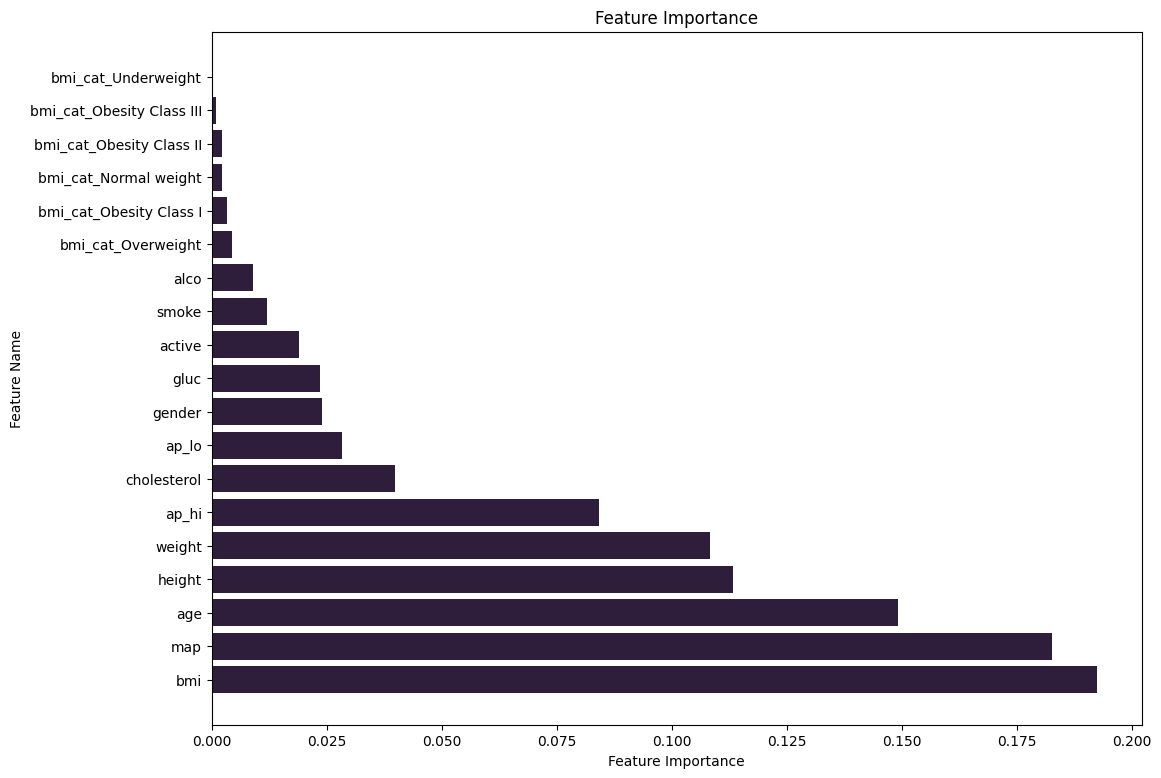

In [151]:
plt.figure(figsize=(12, 9))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance')
plt.show()

## Modeling

In [152]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,classification_report,f1_score,mean_squared_error,roc_auc_score,precision_score,recall_score,roc_curve,ConfusionMatrixDisplay,confusion_matrix,auc
from sklearn.linear_model import LogisticRegression,SGDClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.base import BaseEstimator,TransformerMixin
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


##### Make a validation set

In [153]:
X_train_1,X_valid,y_train_1,y_valid=train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [154]:
print(X_train_1.shape)
print(y_train_1.shape)
print(X_valid.shape)
print(y_valid.shape)

(38804, 19)
(38804,)
(9701, 19)
(9701,)


In [155]:
model_name=[]
accuracy=[]
roc_auc=[]
F1_score=[]
models=[
    #tree models,boosting
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    ExtraTreesClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    CatBoostClassifier(random_state=42),
    #Linear models
    #SGDClassifier(random_state=42),
    #RidgeClassifier(random_state=42),
    LogisticRegression(random_state=42),
    #xgb,svm
    XGBClassifier(random_state=42),
    #SVC(random_state=42)
    
]

for model in models:
    model.fit(X_train_1 , y_train_1)
    prediction = model.predict(X_valid)
    y_predict=model.predict_proba(X_valid)[:, 1]
    model_name.append(model.__class__.__name__)
    accuracy.append((accuracy_score( prediction , y_valid ) * 100 ) )
    roc_auc.append((roc_auc_score(y_valid , y_predict)*100) )
    F1_score.append((f1_score(y_valid , prediction)* 100) )

Learning rate set to 0.049134
0:	learn: 0.6782464	total: 9.6ms	remaining: 9.59s
1:	learn: 0.6653078	total: 18.3ms	remaining: 9.14s
2:	learn: 0.6534139	total: 27ms	remaining: 8.98s
3:	learn: 0.6431423	total: 35.6ms	remaining: 8.88s
4:	learn: 0.6335922	total: 44.6ms	remaining: 8.88s
5:	learn: 0.6252325	total: 53.8ms	remaining: 8.92s
6:	learn: 0.6174347	total: 62.7ms	remaining: 8.9s
7:	learn: 0.6103852	total: 71.9ms	remaining: 8.92s
8:	learn: 0.6039052	total: 80.8ms	remaining: 8.9s
9:	learn: 0.5980490	total: 89.3ms	remaining: 8.84s
10:	learn: 0.5928612	total: 97.8ms	remaining: 8.79s
11:	learn: 0.5883562	total: 106ms	remaining: 8.73s
12:	learn: 0.5841240	total: 114ms	remaining: 8.68s
13:	learn: 0.5801514	total: 123ms	remaining: 8.65s
14:	learn: 0.5768052	total: 132ms	remaining: 8.65s
15:	learn: 0.5739795	total: 140ms	remaining: 8.62s
16:	learn: 0.5714659	total: 148ms	remaining: 8.58s
17:	learn: 0.5688210	total: 156ms	remaining: 8.53s
18:	learn: 0.5663801	total: 165ms	remaining: 8.52s
19:	l

In [156]:
models_df = pd.DataFrame({"Model-Name":model_name, "Accuracy": accuracy ,'AUC':roc_auc ,'F1-Score':F1_score})
#models_df = models_df.drop(columns='Model-Name').columns.astype(float)

models_df.sort_values("AUC", ascending = False)


,Model-Name,Accuracy,AUC,F1-Score
2,GradientBoostingClassifier,73.476961,79.703451,71.870559
5,CatBoostClassifier,73.507886,79.511200,72.131859
4,AdaBoostClassifier,73.054324,79.083010,70.496614
7,XGBClassifier,72.806927,78.855024,71.450216
6,LogisticRegression,72.075044,77.895118,70.646874
1,RandomForestClassifier,70.724668,76.713797,70.391993
3,ExtraTreesClassifier,70.054634,74.886233,69.577966
0,DecisionTreeClassifier,63.220287,63.371903,62.771285


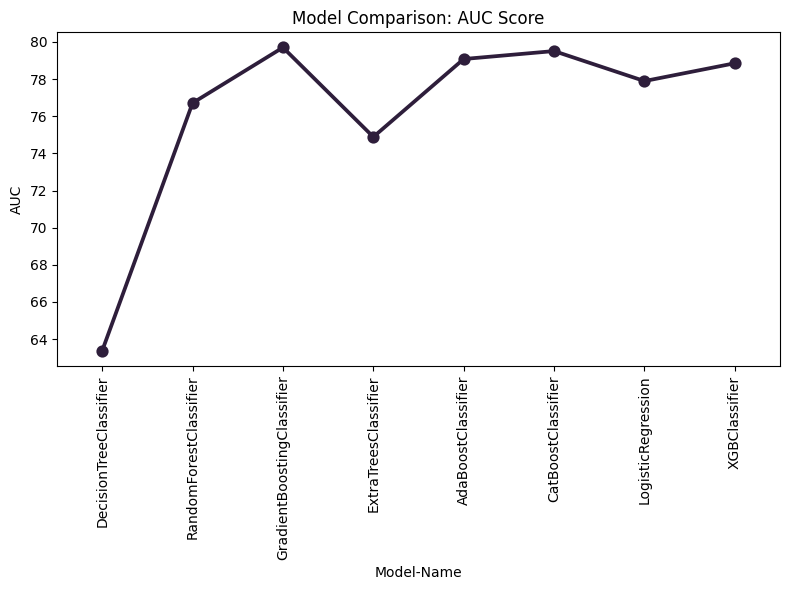

In [157]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model-Name',y='AUC',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: AUC Score')
plt.tight_layout()
plt.show()

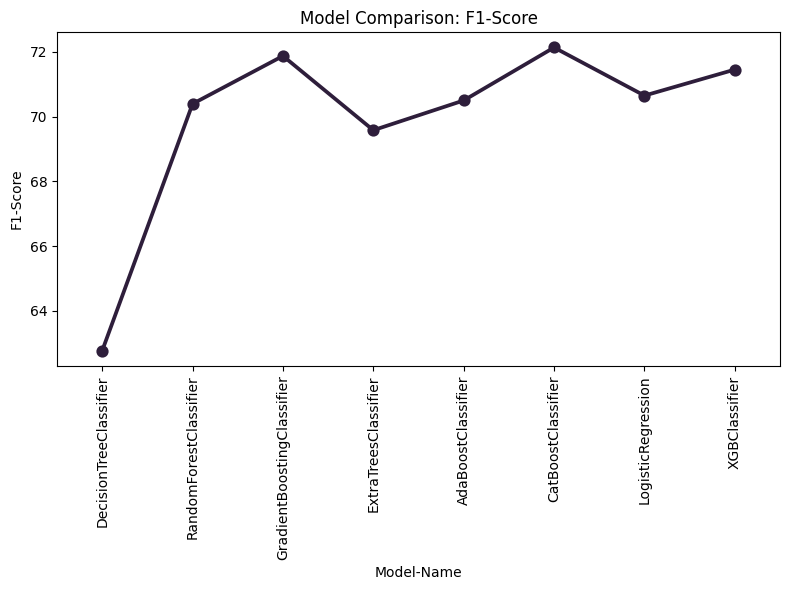

In [158]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model-Name',y='F1-Score',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: F1-Score')
plt.tight_layout()
plt.show()

### Cross Validation

In [159]:
from sklearn.metrics import make_scorer, roc_auc_score
model=GradientBoostingClassifier(random_state=42)
model.fit(X_train_1,y_train_1)
auc_scorer = make_scorer(roc_auc_score, greater_is_better=True, needs_proba=True)
cross_val=cross_val_score(model,X_valid,y_valid,scoring=auc_scorer ,cv=10,verbose=False)
print(cross_val)


[0.79970131 0.78627093 0.79757577 0.78968279 0.81136564 0.7579897
 0.80785108 0.76830658 0.8231094  0.78546315]


In [160]:
print(cross_val.mean())

0.7927316356715318


### Final Model

In [161]:
gbc=GradientBoostingClassifier(random_state=42)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [162]:
X_test.isna().sum()

age                          0
gender                       0
height                       0
weight                       0
ap_hi                        0
ap_lo                        0
smoke                        0
alco                         0
active                       0
bmi                          0
map                          0
cholesterol                  0
gluc                         0
bmi_cat_Normal weight        0
bmi_cat_Obesity Class I      0
bmi_cat_Obesity Class II     0
bmi_cat_Obesity Class III    0
bmi_cat_Overweight           0
bmi_cat_Underweight          0
dtype: int64

In [163]:
y_pred_gbc = gbc.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_gbc)
print("AUC score:", auc_score)

AUC score: 0.801264221366847


In [164]:
#ways for a better score 
#use better diffrent methods like knn imputer instead of imputing with the median 
#Try diffrent encoders  like swapping and trying each feature with a diffrent encoder
#increase the data by using webscarbing or other methods 
#try dropping some features 
#change assumptions about the data 
#hyper parameter tuning
#stratfied train test split

### Plot Confusion Matrix

In [165]:
def plot_confusion_matrix(target_test,target_pred):
    conf=confusion_matrix(target_test,target_pred)
    plot=ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=['-ve', '+ve'])
    plot.plot()
    plt.show()

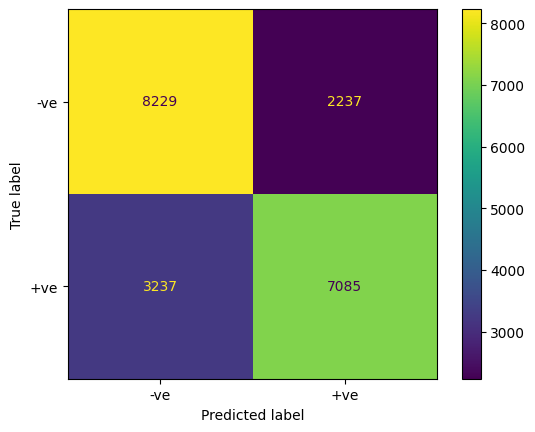

In [166]:
y_pred=gbc.predict(X_test)
plot_confusion_matrix(y_test,y_pred)

In [167]:
def plot_roc_curve(fpr, tpr, label = None):
    
    plt.plot(fpr, tpr, linewidth = 2, label= 'auc= '+ str(label))
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate(Recall)")
    plt.title("ROC Curve")
    plt.axis([0, 1, 0, 1])
    plt.legend(loc=4)
    plt.show()

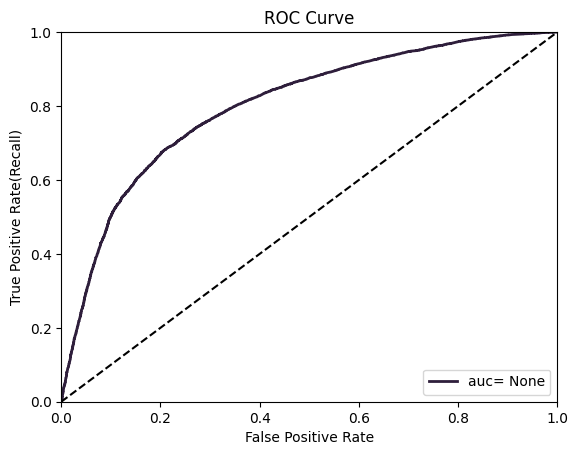

In [168]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_gbc)
# Plot ROC curve
plot_roc_curve(fpr,tpr)

# Now we know how to implement an end to end ml project 

<br>
<br>
<br>
<br>
<br>

# Self Study
### HyperParameter Tuning 
### Stratfied Splitting 
### Other ways of Feature Importance
### Other ways of Cross Validation
### How to implement a Data Preprocessing Pipeline 
